In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(city_df, ride_df, on = "city")
pyber_df = merged_df[["city", "date", "fare", "ride_id", "driver_count", "type"]]

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

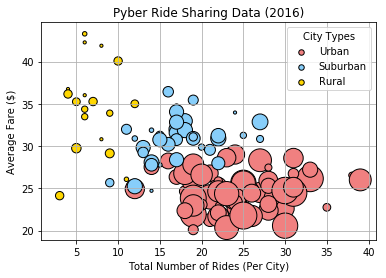

In [30]:
# Create a groupby df for city
city_group = pyber_df.groupby("city")

# Average Fare ($) Per City
avg_fare = city_group["fare"].mean()

# Total Number of Rides Per City
total_rides = city_group["ride_id"].count()

# Total Number of Drivers Per City
total_drivers = city_group["driver_count"].mean()

# City Type (Urban, Suburban, Rural)
city_type = city_df.set_index("city")["type"]

# Create a DataFrame to hold values:
bubble_df = pd.DataFrame({
    "Average Fare": avg_fare,
    "Total Number of Rides": total_rides,
    "Total Number of Drivers": total_drivers,
    "City Type": city_type
})

# Separate for city type
urban_df = bubble_df[bubble_df["City Type"] == "Urban"]
suburban_df = bubble_df[bubble_df["City Type"] == "Suburban"]
rural_df = bubble_df[bubble_df["City Type"] == "Rural"]

# Build the scatter plots for each city types
plt.scatter(urban_df["Total Number of Rides"], urban_df["Average Fare"], color="lightcoral", edgecolor = "k", s = urban_df["Total Number of Drivers"]*10, label = "Urban")
plt.scatter(suburban_df["Total Number of Rides"], suburban_df["Average Fare"], color="lightskyblue", edgecolor = "k", s = suburban_df["Total Number of Drivers"]*10, label = "Suburban")
plt.scatter(rural_df["Total Number of Rides"], rural_df["Average Fare"], color="gold", edgecolor = "k", s = rural_df["Total Number of Drivers"]*10, label = "Rural")

# Create a legend
bubble_legend = plt.legend(title="City Types", fancybox=True)
bubble_legend.legendHandles[0]._sizes = [30]
bubble_legend.legendHandles[1]._sizes = [30]
bubble_legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Save Figure
plt.savefig("Graph Images/Pyber Ride Sharing Scatter Plot.png")

# Show plot
plt.show()

## Total Fares by City Type

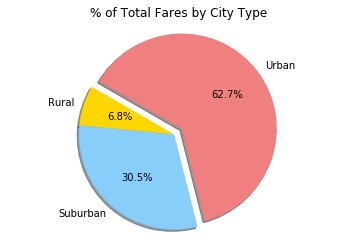

In [21]:
# Create a groupby df for city
type_group = pyber_df.groupby("type")

# Build Pie Chart
fares_labels = ["Rural", "Suburban", "Urban"]
fares_sizes = type_group["fare"].sum()
fares_colors = ["gold", "lightskyblue", "lightcoral"]
fares_explode = (0, 0, 0.1)

plt.pie(fares_sizes, explode=fares_explode, labels=fares_labels, colors=fares_colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Graph Images/Percentage of Total Fares Pie Graph.png")

# Show Figure
plt.show()

## Total Rides by City Type

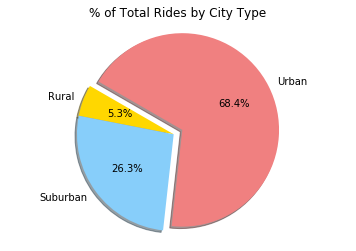

In [26]:
# Build Pie Chart
total_rides_labels = ["Rural", "Suburban", "Urban"]
total_rides_sizes = type_group["ride_id"].count()
total_rides_colors = ["gold", "lightskyblue", "lightcoral"]
total_rides_explode = (0, 0, 0.1)

plt.pie(total_rides_sizes, explode=total_rides_explode, labels=total_rides_labels, colors=total_rides_colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Graph Images/Percentage of Total Rides Pie Graph.png")

# Show Figure
plt.show()

## Total Drivers by City Type

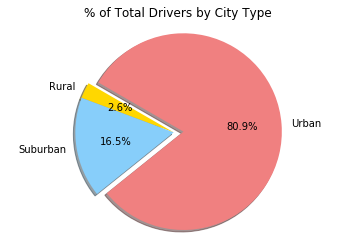

In [54]:
# Build Pie Chart
total_drivers_labels = ["Rural", "Suburban", "Urban"]
total_drivers_sizes = city_df.groupby("type")["driver_count"].sum()
total_drivers_colors = ["gold", "lightskyblue", "lightcoral"]
total_drivers_explode = (0, 0, 0.1)

plt.pie(total_drivers_sizes, explode=total_drivers_explode, labels=total_drivers_labels, colors=total_drivers_colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Graph Images/Percentage of Total Drivers Pie Graph.png")

# Show Figure
plt.show()